In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'

from tqdm.auto import tqdm
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Read dataset
df = pd.read_csv("../data/house_price/train.csv") # changed index_col
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
feature_list=["YearBuilt","LotArea","BedroomAbvGr","KitchenAbvGr","YrSold","PoolArea","Neighborhood"]
X_df = df[feature_list]
y_df = df[["SalePrice"]]

In [5]:
le = LabelEncoder()
for feature_name in ["Neighborhood"]:
    # Using .fit_transform function to fit label encoder and return encoded label
    X_df[f'{feature_name}'] = le.fit_transform(X_df[feature_name])

/home/pi/Projects/data_toolbox/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [6]:
# select train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_df, 
    y_df, 
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

In [7]:
grid_param = { 
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2, 5, 7],
    'criterion' :["squared_error"]
}
model = RandomForestRegressor(random_state=42)
grid_mse = GridSearchCV(estimator=model, param_grid=grid_param, cv=5, verbose=0, scoring="neg_mean_squared_error")
grid_mse.fit(X_train, y_train)
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

/home/pi/Projects/data_toolbox/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/pi/Projects/data_toolbox/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/pi/Projects/data_toolbox/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/pi/Projects/data_toolbox/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change 

/home/pi/Projects/data_toolbox/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/pi/Projects/data_toolbox/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/pi/Projects/data_toolbox/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/pi/Projects/data_toolbox/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change 

/home/pi/Projects/data_toolbox/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/pi/Projects/data_toolbox/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/pi/Projects/data_toolbox/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/pi/Projects/data_toolbox/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change 

Best parameters found:  {'criterion': 'squared_error', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}
Lowest RMSE found:  45975.36083390444


In [8]:
rf = RandomForestRegressor(max_depth=7, n_estimators=200, random_state=42) #  avoid overfitting
rf.fit(X_train, y_train)

/home/pi/Projects/data_toolbox/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=7, n_estimators=200, random_state=42)

In [9]:
y_train_preds = rf.predict(X_train)
y_test_preds = rf.predict(X_test)

In [10]:
rf.score(X_train, y_train)

0.8473380742398406

In [11]:
rf.score(X_test, y_test)

0.6707426604973423

In [12]:
importances = rf.feature_importances_
importances_std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(x=feature_list, y=importances, error_y=dict(type='data', array=importances_std, visible=True)))
fig.update_layout(title=f"Sale prices", yaxis_title='Mean decrease in impurity')
fig.show()

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_df['LotArea'], y=y_df["SalePrice"],mode='markers'))
fig.update_layout(title=f"Sale price by year built", yaxis_title='price', xaxis_title='Lot Area')
fig.show()

In [14]:
DM_train = xgb.DMatrix(data=X_train, label=y_train)
grid_param = {"learning_rate": [0.01, 0.1],
              "n_estimators": [100, 150, 200],
              "alpha": [0.1, 0.5, 1],
              "max_depth": [2, 3, 4]}
model = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator=model, param_grid=grid_param,
                       scoring="neg_mean_squared_error",
                       cv=4, verbose=0)
grid_mse.fit(X_train, y_train)
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Best parameters found:  {'alpha': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Lowest RMSE found:  43792.78504710051


In [15]:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', 
                            learning_rate = 0.1,
                            max_depth = 3, 
                            alpha = 0.5, 
                            n_estimators = 150)
xgb_model.fit(X_train, y_train)
xgb_prediction = xgb_model.predict(X_test)

In [16]:
xgb_model.score(X_train, y_train)

0.8401002332835518

In [17]:
xgb_model.score(X_test, y_test)

0.6750630266586614

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

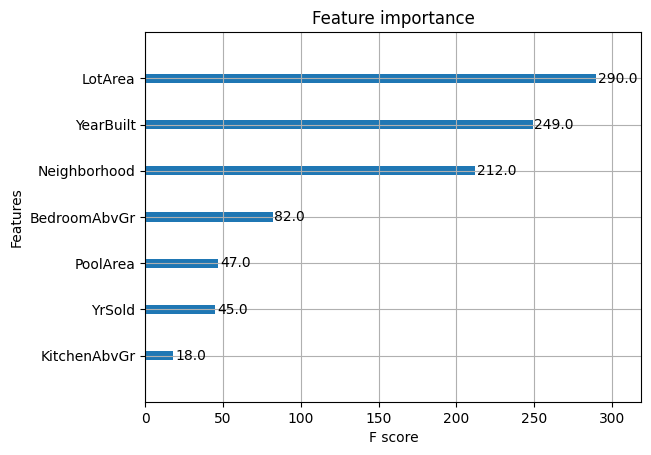

In [18]:
xgb.plot_importance(xgb_model) 